In [12]:
import daft
import pyiceberg
import pyiceberg.catalog
import numpy
import mlflow

In [13]:
catalog = pyiceberg.catalog.load_catalog(                                                                                                                                                                                                                                    
            uri="http://nessie:19120/iceberg",                                                                                                                                                                                                                                            
            properties={                                                                                                                                                                                                                                                          
                "s3": {                                                                                                                                                                                                                                                           
                    "endpoint": "http://minio:9000",                                                                                                                                                                                                         
                    "access-key-id": "admin",                                                                                                                                                                                                         
                    "secret-access-key": "miniopass",                                                                                                                                                                                                 
                }                                                                                                                                                                                                                                                                 
            },                                                                                                                                                                                                                                                                    
        )  

In [14]:
table = catalog.load_table("mnist.fashion")
df = daft.read_iceberg(table)

In [4]:
from PIL import Image

images_df = df.with_column(
    "image_2d",
    daft.col("pixels").apply(lambda l: 255 - numpy.array(l).reshape(28, 28), return_dtype=daft.DataType.python()),
)
images_df = images_df.with_column("image", daft.col("image_2d").apply(lambda arr: Image.fromarray(arr.astype(numpy.uint8)), return_dtype=daft.DataType.python()))
images_df = images_df.collect()

ScanWithTask-Project-Project [Stage:1]:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
images_df.where(daft.col("class") == 4).show(10)

pixelsList[Int32],classInt32,image_2dPython,imagePython
"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 12, 55, 98, 52, 45, 70, 47, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 52, 93, 144, 83, 66, 86, 78, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 67, 36, 118, 151, 60, 28, 63, 44, 60, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 43, 29, 90, 211, 232, 157, 90, 22, 21, 53, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 36, 63, 99, 70, 63, 246, 241, 164, 116, 80, 110, 145, 117, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 66, 56, 63, 109, 55, 223, 255, 225, 110, 134, 105, 79, 76, 87, 49, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 43, 59, 62, 39, 25, 44, 229, 228, 43, 40, 43, 62, 51, 56, 74, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 58, 48, 49, 58, 60, 47, 16, 234, 180, 17, 59, 55, 64, 53, 60, 75, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 59, 40, 48, 40, 47, 56, 32, 78, 60, 41, 60, 49, 59, 49, 78, 72, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 37, 68, 53, 37, 47, 45, 49, 22, 156, 93, 28, 56, 53, 62, 58, 103, 55, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 56, 66, 41, 41, 48, 49, 31, 89, 60, 37, 48, 56, 56, 63, 93, 49, 87, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 66, 60, 99, 55, 39, 47, 47, 37, 76, 62, 39, 51, 60, 58, 72, 113, 47, 98, 20, 0, 0, 0, 0, 0, 0, 0, 0, 9, 63, 71, 113, 48, 39, 47, 51, 35, 85, 67, 39, 63, 64, 59, 110, 140, 52, 87, 43, 0, 0, 0, 0, 0, 0, 0, 0, 14, 53, 68, 106, 29, 48, 47, 55, 37, 74, 58, 45, 58, 62, 59, 121, 120, 37, 95, 52, 0, 0, 0, 0, 0, 0, 0, 0, 24, 56, 67, 124, 36, 47, 48, 51, 39, 75, 76, 47, 51, 68, 71, 117, 140, 60, 76, 60, 0, 0, 0, 0, 0, 0, 0, 0, 43, 62, 70, 114, 36, 43, 49, 49, 33, 75, 78, 39, 53, 66, 74, 98, 126, 62, 68, 89, 0, 0, 0, 0, 0, 0, 0, 0, 49, 68, 107, 116, 12, 56, 44, 52, 33, 74, 75, 33, 66, 49, 101, 86, 103, 85, 86, 109, 0, 0, 0, 0, 0, 0, 0, 0, 44, 71, 114, 97, 18, 66, 44, 52, 44, 67, 79, 47, 59, 33, 133, 91, 49, 121, 76, 110, 40, 0, 0, 0, 0, 0, 0, 0, 53, 68, 121, 37, 16, 55, 47, 52, 40, 66, 83, 47, 49, 49, 97, 91, 29, 102, 70, 109, 60, 0, 0, 0, 0, 0, 0, 0, 47, 56, 113, 32, 18, 55, 47, 59, 37, 60, 91, 33, 60, 62, 63, 90, 8, 114, 76, 80, 49, 0, 0, 0, 0, 0, 0, 0, 48, 59, 99, 20, 29, 52, 49, 55, 41, 64, 89, 35, 64, 48, 55, 111, 14, 59, 70, 67, 36, 0, 0, 0, 0, 0, 0, 0, 45, 63, 106, 0, 52, 52, 49, 48, 43, 58, 90, 49, 56, 59, 59, 99, 43, 21, 83, 76, 52, 0, 0, 0, 0, 0, 0, 0, 45, 63, 97, 0, 43, 48, 52, 48, 41, 55, 94, 43, 58, 70, 55, 85, 49, 5, 86, 75, 45, 0, 0, 0, 0, 0, 0, 0, 45, 70, 67, 14, 86, 41, 49, 51, 45, 58, 89, 36, 67, 63, 53, 80, 56, 1, 86, 71, 48, 0, 0, 0, 0, 0, 0, 0, 58, 99, 51, 45, 118, 39, 52, 48, 47, 55, 63, 55, 64, 53, 67, 70, 78, 0, 82, 91, 68, 0, 0, 0, 0, 0, 0, 0, 14, 25, 10, 29, 39, 49, 53, 44, 45, 48, 49, 64, 51, 62, 64, 58, 90, 6, 0, 13, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 53, 53, 55, 55, 53, 66, 63, 62, 70, 70, 76, 93, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 53, 45, 53, 44, 43, 39, 43, 45, 41, 62, 49, 60, 56, 67, 22, 0, 2, 0, 0, 0, 0]",4,"<np.ndarrayshape=(28, 28)dtype=int64>","<img style=""max-height:128px;width:auto"" src=""data:image/png;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APermdba3eZgSF7Dua8o8WavrVprui3MNt59ve3DWEoaTOGflCoBBGcN1GBtrutC1iV3FpdW7RAnEJMwkPTocD8utdFWJ4puWttKLKRuB3YPfAJ/wrGuQN8BOfknU8EjJww/Ec9DWeL0xa3Eu0ARIJc5OOJFyPyFeiVz/ii3W7WxgcZWSdVI9ty5/TNZdy+9lkUnDTowwfVv/r1mz2SXC3UnIIEbkj0IKED8dh/CvQbUlrSEsSSUUknqeKh1CGKS1eR41Z4kZkLDO046iuaWFTEFHyqOAAAMD2qTR7eOXUisqiRHiIZGAIP3T0/AV1aqqKFUBVUYAHQCv//Z"" alt="""" />"
"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 27, 103, 120, 125, 59, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 75, 178, 160, 139, 

In [15]:
pixels = df.select("pixels")
classes = df.select("class")

In [16]:
pixels_arr = numpy.vstack(pixels.to_arrow()["pixels"].to_numpy())
classes_arr = classes.to_arrow()["class"].to_numpy()

ScanWithTask [Stage:3]:   0%|          | 0/1 [00:00<?, ?it/s]

ScanWithTask [Stage:4]:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
print(pixels_arr.shape)
print(classes_arr.shape)

(70000, 784)
(70000,)


In [18]:
import sklearn
import sklearn.svm
import sklearn.decomposition
import sklearn.pipeline

In [19]:
model_pca = sklearn.decomposition.PCA(n_components=50)

In [20]:
model_svc = sklearn.svm.SVC()

In [21]:
model = sklearn.pipeline.make_pipeline(model_pca, model_svc)

In [22]:
    mlflow.autolog()
    
    with mlflow.start_run():
        model.fit(pixels_arr, classes_arr)

2024/08/01 10:24:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/08/01 10:27:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not connect to the endpoint URL: "https://storage.s3.euwest.amazonaws.com/0/22df4de9b9d542c989705687565592bb/artifacts/training_confusion_matrix.png"
2024/08/01 10:27:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run merciful-trout-428 at: http://mlflow-tracking/#/experiments/0/runs/22df4de9b9d542c989705687565592bb.
2024/08/01 10:27:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow-tracking/#/experiments/0.


In [11]:
import pickle

In [88]:
with open("mnist/model_50", "wb") as f:
    pickle.dump(model, f)

In [12]:
with open("mnist/model", "rb") as f:
    model = pickle.load(f)

In [89]:
classes_pred = model.predict(pixels_arr)

In [90]:
with open("mnist/classes_pred_50", "wb") as f:
    pickle.dump(classes_pred, f)

In [ ]:
with open("mnist/classes_pred", "rb") as f:
    classes_pred = pickle.load(f)

In [19]:
import sklearn.metrics
import sklearn.preprocessing

In [15]:
import matplotlib.pyplot as plt

In [91]:
classes_arr_ohe = sklearn.preprocessing.OneHotEncoder().fit_transform(classes_arr.reshape(-1, 1)).toarray()
classes_pred_ohe = sklearn.preprocessing.OneHotEncoder().fit_transform(classes_pred.reshape(-1, 1)).toarray()

In [92]:
precision, recall = [None for _ in range(10)], [None for _ in range(10)]
avg_precision = [None for _ in range(10)]

for iclass in range(10):
    precision[iclass], recall[iclass], _ = sklearn.metrics.precision_recall_curve(classes_arr_ohe[:, iclass], classes_pred_ohe[:, iclass])
    avg_precision[iclass] = sklearn.metrics.average_precision_score(classes_arr_ohe[:, iclass], classes_pred_ohe[:, iclass])

In [93]:
precision = numpy.vstack(precision)
recall = numpy.vstack(recall)
avg_precision = numpy.array(avg_precision)

In [38]:
import matplotlib.pyplot as plt

In [43]:
import pandas

In [94]:
df_test = pandas.DataFrame.from_dict({"precision": precision[:, 1], "recall": recall[:, 1], "avg_precision": avg_precision})
df_test["index"] = list(range(10))
df_test = df_test.melt(id_vars="index")

In [51]:
import seaborn

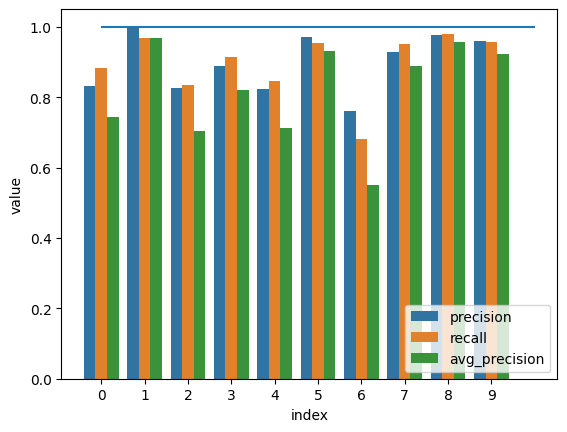

In [100]:
seaborn.barplot(x='index', y='value', hue='variable', data=df_test)
plt.hlines(y=1, xmin=0, xmax=10)
plt.legend(loc="lower right")